In [5]:
import pandas as pd
import numpy as np
import json
import tqdm 
import matplotlib.pyplot as plt 

import sys
sys.path.append('../dataloaders/')
sys.path.append('../utils/')

from dataloader import DataLoader 

In [6]:
f = open("/home/lhv14/seedmapping_noMissing_noPtcut__noDoubles_1400.json") 

mappings = json.load(f)

In [7]:
dl = DataLoader()
hits, allowed_pids = dl.load_data_trackml(0)

../dataloaders/dataloader.py:154: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  self.hits[['next_mod_id', 'connecting_layer_id']] = self.hits.groupby('particle_id')['discrete_module_id', 'unique_layer_id'].shift(-1)


In [13]:
allowed_tracks = hits[hits['particle_id'].isin(allowed_pids)]

tried = 0 
found = 0 
not_in_map = 0 
for pid in np.unique(allowed_tracks.particle_id): 
    p = hits[hits['particle_id']==pid]
    mod1 = p.iloc[0].discrete_module_id
    mod2 = p.iloc[1].discrete_module_id
    other_mods = p.iloc[2:].discrete_module_id.values
    
    try: 
        found_mods = sum([x in mappings[str(int(mod1))][str(int(mod2))] for x in other_mods])
        if found_mods < len(other_mods): 
            print(mod1, mod2, other_mods)
    except: 
        not_in_map += 1
        found_mods = 0
        
    found += found_mods
    tried += len(other_mods)


857.0 1182.0 [ 1705  2494  5357  6275  7535  7534  9223 12950 15306]
871.0 1210.0 [ 1802  1803  1855  2796  5512  6547  8070 10127 14253 17412]
865.0 1166.0 [ 1167  1731  2533  5337  6247  6246  7495  9069  9068 12647]
866.0 1168.0 [ 1682  2459  5339  6249  7420  8971 12533 12415]
815.0 1002.0 [ 721  724  615  507  399 4632 4462 4290 4120]
870.0 1241.0 [ 1905  2950  5551  6659  8305 10539 18167 18168 18166]
866.0 1201.0 [ 1787  1788  2773  2695  5460  6475  7891  9791 13737 16607 16606]
866.0 1201.0 [ 1788  2696  5461  6476  7892  9793 13740 16610]
856.0 1181.0 [ 1703  2569  5355  6328  7608  9319 13062 13061 15598]
856.0 1180.0 [ 1753  2566  5394  6326  7605  9417 13177 15744]
3307.0 3418.0 [3421 3415 3526 3523 3529 3634 3631 3637 3742 3850 3958]
846.0 1128.0 [ 1617  2283  5249  5209  5208  6010  4954  4955  4781 12187 12189 12090]
871.0 1210.0 [ 1854  1855  2796  5512  6547  8070 10127 14253 14252 17563]
864.0 1163.0 [1673 2444 5331 5330 6236 7399 8837 8836]
866.0 1201.0 [ 1787  2695

899.0 1298.0 [ 1998  3168  5703  6929  6928 10828 10999 11175 11172 18545 18543 18643
 18644 18642]
912.0 1389.0 [ 3333  3335  3441  3549  3657 11123 11290 11293 11460 11461 11631 11802
 11801]
882.0 1264.0 [ 1265  1943  3085  5621  6812  8596 10986 18334 18337]
1145.0 1697.0 [ 2560  2561  5391  6378  7755  9611 13523 16331 16483]
881.0 1295.0 [ 1991  1992  3079  5657  6862  8663 10957 18414 18412 18413]
865.0 1167.0 [ 1680  2457  5339  5299  6193  7344  8874  8772 12422 12327]
3007.0 5581.0 [ 6756  8362 10613 18141 18140 18237]
824.0 1052.0 [1053  677  568  569  460 4896 4723 4553 4378 4208 4036]
869.0 1206.0 [ 1796  2707  2708  5466  6483  7902  9907  9906 13872 16928]
850.0 1104.0 [ 1526  5138  5000  4828  4654  4484  4481 12016 11917 11918]
1979.0 3060.0 [ 5567  6679  8251 10461 14759 14758 18175]
892.0 1316.0 [ 2026  5763 10899 10897 10900 11067 11235 11402 18669]
871.0 1211.0 [ 1803  2718  5432  6434  7833  9815 13763 16634]
854.0 1112.0 [ 1113  1592  2246  5190  5986  4886  4889

1123.0 1556.0 [ 1557  2193  2194  5203  5948  5947  4940  4772  4771  4602 12087 11992
 11990]
826.0 993.0 [ 691  584  476  474  366 4748 4575 4405 4231 4233 4063]
833.0 1070.0 [ 739  631  523 5000 4830 4660 4494 4491 4324 4155]
858.0 1153.0 [ 1657  1658  2422  5320  5280  6166  7305  8820  8819 12367 12366 12368]
869.0 1238.0 [ 1899  2941  5546  6651  8292 10518 14832 18142]
895.0 1290.0 [ 1984  3146  5691  6910 10936 11105 18402 18498 18499]
833.0 1038.0 [1039  739  738  631  630  522 4823 4653 4482 4312 4141]
855.0 1115.0 [ 1595  1596  2251  2252  5233  5193  5988  4892  4719 12155 12056]
855.0 1114.0 [ 1595  2328  5232  6044  7057  4892 12156 12157]
885.0 1334.0 [ 1335  2108  3257  3365 10827 10831 10997 11165 11335 11502 11839]
885.0 1271.0 [ 1953  3100  5668  6878 10839 11011 18347 18446 18444]
898.0 1296.0 [ 2045  3237  5737  7029 10955 11121 11289 18602 18698]
881.0 1230.0 [ 1835  2767  5458  5457  6527  6471  7965  9888 13853 16755 16907]
939.0 3299.0 [ 3297  3407  3405  3515 

906.0 1409.0 [ 3291  3400  3508  3616  3724 11224 11227 11394 11565 11564 11735]
854.0 1176.0 [ 1695  2478  5349  6262  7516  7515  9094 12795 15105 15104]
880.0 1228.0 [ 1229  1261  1884  2919  5575  6692  8273  8272 10495 14807]
917.0 3261.0 [ 3259  3369  3367  3477  3475  3586  3695  3694  3803  3802  3911 11353
 11526 11696]
864.0 1196.0 [1197 1781 2608 5417 5416 6359 7732 9487]
849.0 1070.0 [1470  735 5054 4981 4808 4636 4463 4289]
837.0 1079.0 [ 1485  1486  5109  4877  4709  4539  4371  4374 11857]
844.0 1092.0 [ 1559  5164  5892  5891  4937  4767  4595 11983 11884]
861.0 1158.0 [ 1126  1613  2356  5246  6120  6119  7162  4948 12287 12285 12190 12188]
826.0 1025.0 [ 693  585  477 4584 4415 4245 4076 4075]
868.0 1268.0 [ 1236  1999  1948  3091  5663  5662  6869  8672 10974 11141 18420 18516
 18517]
901.0 1366.0 [ 3258  3366  3474 11010 11180 11352 11522 11694]
937.0 3289.0 [ 3286  3397  3394  3505  3502  3613  3720  3828  3936 11564 11734]
905.0 1309.0 [1962 3036 5556 6666 8237]
7

KeyboardInterrupt: 

In [39]:
found/tried

0.40552415644891754

In [14]:
mappings['857']['1182'] 

[10254,
 13678,
 14385,
 12340,
 12341,
 12342,
 12343,
 12345,
 13444,
 12351,
 13679,
 13446,
 6212,
 6213,
 6214,
 6215,
 6216,
 6217,
 6218,
 6219,
 6220,
 6221,
 6222,
 6223,
 6224,
 10328,
 12377,
 13680,
 12379,
 4188,
 12381,
 12384,
 10342,
 5314,
 13681,
 8310,
 6267,
 6268,
 6269,
 6270,
 6271,
 6272,
 6273,
 6274,
 6275,
 6276,
 6277,
 6278,
 6279,
 6280,
 5318,
 5320,
 12442,
 12444,
 12445,
 12446,
 12447,
 12448,
 12449,
 12450,
 12458,
 12459,
 12461,
 9206,
 9613,
 6323,
 6324,
 6325,
 6326,
 6327,
 6328,
 6329,
 6330,
 6331,
 6332,
 6333,
 6334,
 6335,
 6336,
 12480,
 7365,
 12483,
 12484,
 7366,
 12485,
 6552,
 9207,
 12486,
 12490,
 12488,
 12489,
 7367,
 6555,
 7369,
 7370,
 6558,
 2489,
 6380,
 6381,
 6382,
 6383,
 6384,
 6385,
 6386,
 6387,
 6388,
 6389,
 6390,
 6391,
 6392,
 9411,
 9819,
 9412,
 9820,
 9821,
 9414,
 4361,
 9823,
 9009,
 12563,
 12564,
 7382,
 12565,
 12566,
 12568,
 12569,
 12570,
 12571,
 12572,
 12573,
 12574,
 12575,
 9825,
 12577,
 12576,
 9

In [40]:
not_in_map

2729

In [42]:
found

21597

In [43]:
tried

53257

In [3]:
 mappings['849']['1102']

[5134,
 5135,
 5136,
 5137,
 5138,
 5139,
 5140,
 4824,
 4630,
 4991,
 12310,
 4633,
 4634,
 4482,
 4636,
 4637,
 4631,
 4639,
 4640,
 4642,
 4643,
 12015,
 4645,
 4646,
 1575,
 4648,
 1574,
 1576,
 4649,
 4652,
 4651,
 4654,
 4995,
 4655,
 4657,
 4658,
 4659,
 4486,
 4661,
 4662,
 5175,
 4664,
 5176,
 5178,
 5177,
 4668,
 4667,
 4670,
 4665,
 4671,
 4673,
 4674,
 4317,
 4676,
 4491,
 4677,
 4679,
 4682,
 6019,
 4318,
 12011,
 5215,
 5216,
 4319,
 625,
 627,
 628,
 630,
 631,
 5010,
 633,
 634,
 741,
 4813,
 4816,
 2217,
 2218,
 2219,
 2220,
 2221,
 2222,
 4627,
 4797,
 4800,
 4803,
 4485,
 4805,
 4806,
 4807,
 4808,
 4809,
 4297,
 4811,
 4812,
 4300,
 4814,
 4815,
 4303,
 4817,
 4306,
 4819,
 4308,
 4820,
 4822,
 4311,
 4823,
 4825,
 4826,
 4314,
 4828,
 733,
 4830,
 4831,
 735,
 4833,
 4322,
 739,
 736,
 4837,
 742,
 4834,
 738,
 12004,
 12010,
 4842,
 12012,
 1573,
 12014,
 4839,
 12016,
 12008,
 12018,
 4843,
 12020,
 12013,
 12022,
 4846,
 12024,
 12017,
 12026,
 12027,
 12028,
 1

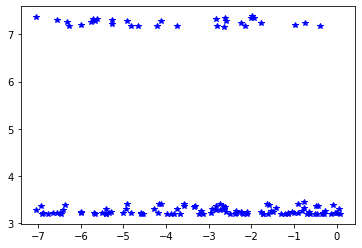

In [17]:
#['857']['1182'] 

m1 = hits[hits['discrete_module_id']==857]
m2 = hits[hits['discrete_module_id']==1182]

compys = hits[hits['discrete_module_id'].isin( mappings['857']['1182'])]

plt.plot(m1.z, m1.r, "b*")
plt.plot(m2.z, m2.r, "b*")

#plt.plot(compys.z, compys.r, "kx")

In [9]:
hits

,hit_id,x,y,z,r,layer_id,volume_id,module_id,phi,particle_id,pt,nhits,q,discrete_module_id,Unnamed: 0,unique_layer_id,z_2,diff_z
0,40897,3.011360,-0.224460,81.750000,3.019714,6,9,52,-0.074400,382808236069224448,0.677168,12,1,3515,30,20.0,82.250000,0.500000
1,8965,0.571231,-2.968350,-69.750000,3.022814,12,7,31,-1.380680,328768064197754880,0.457434,13,-1,570,26,12.0,-70.199997,-0.449997
2,10267,-1.268410,2.744500,-69.800003,3.023432,12,7,90,2.003720,207169431149740032,0.272782,10,-1,629,26,12.0,-70.250000,-0.449997
3,35879,0.065512,-3.023100,59.799999,3.023810,2,9,25,-1.549129,405342245844156416,0.168487,13,1,3272,28,18.0,60.200001,0.400002
4,38021,-1.251360,-2.754950,70.199997,3.025831,4,9,17,-1.997156,792636420635230208,0.224269,12,1,3372,29,19.0,81.750000,11.550003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76528,87227,-102.432999,-4.452600,-107.860001,102.529724,4,17,1,-3.098152,481912991516721152,0.362321,16,1,14948,15,10.0,NaN,NaN
76529,88557,33.507103,-96.901901,-36.340000,102.531479,4,17,958,-1.237883,481887359151898624,0.561965,13,-1,15905,15,10.0,NaN,NaN
76530,90916,55.879997,85.968399,62.340004,102.533607,4,17,2532,0.994417,274721089098088448,0.701133,11,1,17479,15,10.0,NaN,NaN
76531,89133,12.445000,101.776001,-16.820000,102.534058,4,17,1327,1.449122,333296608995180544,0.862122,15,1,16274,15,10.0,NaN,NaN
